In [12]:
import pandas as pd

In [13]:
daily_transf = pd.read_csv("Bayesian_20.csv").set_index("datetime")
retrain = pd.read_csv("Retrain_Bayesian_20.csv").set_index("datetime")
ensemble = pd.read_csv("Daily_Eval_20.csv").set_index("datetime")
# usual = pd.read_csv("")

In [14]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_absolute_error


def get_rmse(result: pd.DataFrame, model_name: str, baseline_name: str) -> pd.DataFrame:
    rmse = []
    for date, row in result.iterrows():
        true_vols = np.fromstring(row.true_vols.strip("[]").replace("\n", " "), sep=" ")
        model_preds = np.fromstring(
            row.model_preds.strip("[]").replace("\n", " "), sep=" "
        )
        baseline_preds = np.fromstring(
            row.baseline_preds.strip("[]").replace("\n", " "), sep=" "
        )
        uncerts = np.fromstring(
            row.baseline_preds.strip("[]").replace("\n", " "), sep=" "
        )

        rmse.append(
            [
                date,
                root_mean_squared_error(true_vols, model_preds),
                root_mean_squared_error(true_vols, baseline_preds),
                mean_absolute_error(true_vols, model_preds),
                mean_absolute_error(true_vols, model_preds),
                uncerts.mean(),
            ]
        )

    return pd.DataFrame(
        rmse, columns=["date", model_name, baseline_name, "MAE1", "MAE2", "uncert"]
    ).set_index("date")

In [15]:
retrain_rmse = get_rmse(retrain, "LSTM Uncert Retrain", "Naive")
ensemble_rmse = get_rmse(ensemble, "LSTM Uncert Ensemble", "Naive")

In [16]:
def represent_as_html(df: pd.DataFrame) -> str:
    return df.style.format({var: "{:,.8%}".format for var in df.columns})

In [17]:
represent_as_html(retrain_rmse.mean(axis=0).to_frame())

,0
LSTM Uncert Retrain,0.01514191%
Naive,0.01520018%
MAE1,0.00831098%
MAE2,0.00831098%
uncert,0.01519459%


In [18]:
represent_as_html(retrain_rmse.std(axis=0).to_frame())

,0
LSTM Uncert Retrain,0.01800430%
Naive,0.01662119%
MAE1,0.00754087%
MAE2,0.00754087%
uncert,0.00439197%


In [19]:
represent_as_html(ensemble_rmse.mean(axis=0).to_frame())

,0
LSTM Uncert Ensemble,0.01511618%
Naive,0.01501475%
MAE1,0.00831425%
MAE2,0.00831425%
uncert,0.01480871%


In [20]:
represent_as_html(ensemble_rmse.std(axis=0).to_frame())

,0
LSTM Uncert Ensemble,0.01801922%
Naive,0.01666490%
MAE1,0.00753899%
MAE2,0.00753899%
uncert,0.00427955%


In [21]:
rmse = get_rmse(daily_transf, "LSTM", "Naive")
rmse

,LSTM,Naive,MAE1,MAE2,uncert
date,,,,,
2018-06-30,0.000212,0.000096,0.000190,0.000190,0.000238
2018-07-03,0.000174,0.000002,0.000174,0.000174,0.000242
2018-07-04,0.000185,0.000126,0.000140,0.000140,0.000246
2018-07-05,0.000109,0.000089,0.000098,0.000098,0.000248
2018-07-06,0.000115,0.000125,0.000087,0.000087,0.000249
...,...,...,...,...,...
2018-09-26,0.000027,0.000118,0.000021,0.000021,0.000151
2018-09-27,0.000068,0.000120,0.000032,0.000032,0.000150
2018-09-28,0.000097,0.000120,0.000048,0.000048,0.000149


In [22]:
represent_as_html(rmse.mean(axis=0).to_frame())

,0
LSTM,0.01522439%
Naive,0.01701130%
MAE1,0.00837838%
MAE2,0.00837838%
uncert,0.01871919%


In [23]:
represent_as_html(rmse.std(axis=0).to_frame())

,0
LSTM,0.01802035%
Naive,0.01579586%
MAE1,0.00762221%
MAE2,0.00762221%
uncert,0.00296011%


In [24]:
rmse = rmse.reset_index()
rmse["date"] = pd.to_datetime(rmse["date"])
rmse = rmse.set_index("date")

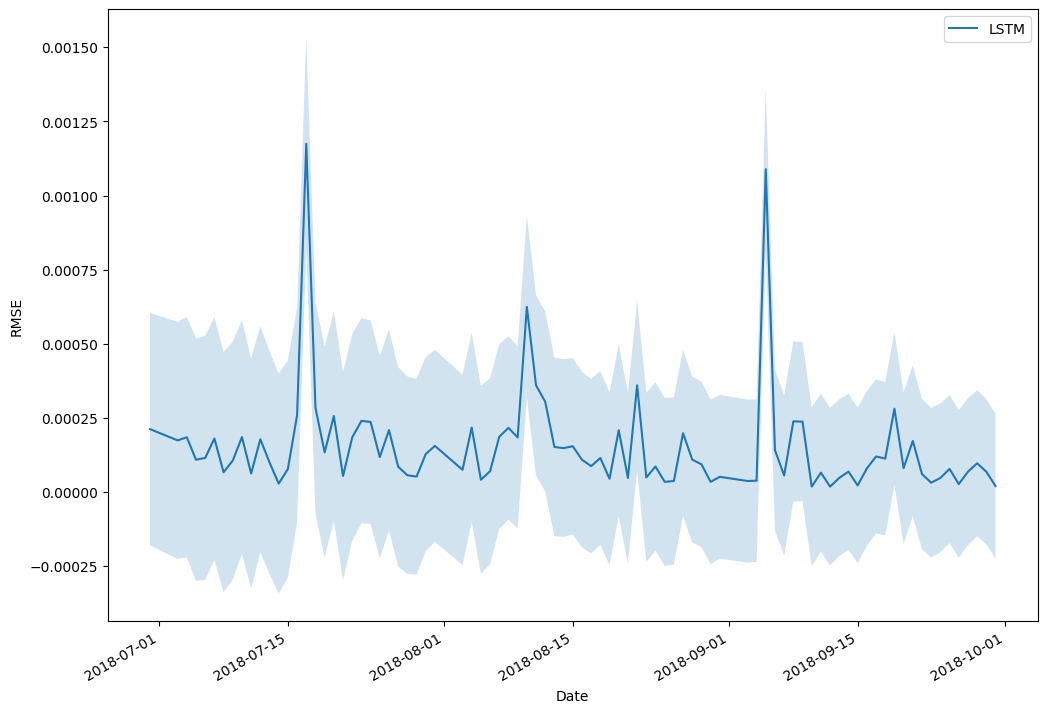

In [25]:
import matplotlib.pyplot as plt

ci_up = rmse["LSTM"] + rmse["uncert"] * 1.65
ci_down = rmse["LSTM"] - rmse["uncert"] * 1.65

fig = plt.figure(figsize=(12, 9))

plt.plot(rmse.index, rmse["LSTM"].to_numpy(), label="LSTM")
plt.fill_between(
    rmse.index,
    ci_up.to_numpy(),
    ci_down.to_numpy(),
    alpha=0.2,
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("RMSE")
ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%M/%Y'))
plt.gcf().autofmt_xdate()
plt.show()
# plt.savefig("new.png")

fig.savefig("temp.png", dpi=fig.dpi)

In [26]:
rmse.index

DatetimeIndex(['2018-06-30', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09',
               '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13',
               '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21',
               '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25',
               '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29',
               '2018-07-30', '2018-07-31', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
      

In [27]:
rmse.mean(axis=0)

NameError: name 'results' is not defined

In [ ]:
mu = rmse.mean(axis=0).to_frame()


def represent_as_html(df: pd.DataFrame) -> str:
    return df.style.format({var: "{:,.8%}".format for var in df.columns})

In [ ]:
represent_as_html(mu)

In [ ]:
std = rmse.std(axis=0).to_frame()
represent_as_html(std)

In [ ]:
rmse[["LSTM", "Naive"]].plot(figsize=(12, 9));

In [ ]:
rmse[["Transformer", "LSTM"]].plot();

In [ ]:
from config.experiment_config import ExperimentConfig
from config.model_config import ModelConfig

model_config = ModelConfig()
experiment_config = ExperimentConfig()

data = pd.read_csv(experiment_config.PATH_DATA / experiment_config.DATASET.value)
data["datetime"] = pd.to_datetime(data["datetime"])
data = data.sort_values(by="datetime")
data = data.set_index("datetime")
data.index = data.index.tz_localize(None)

In [ ]:
data.shape

In [ ]:
data.index.min(), data.index.max()